In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

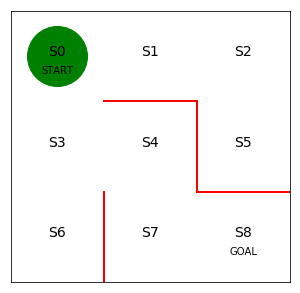

In [2]:
# Initial state of the maze

fig = plt.figure(figsize=(5, 5))
ax = plt.gca()

# draw walls
plt.plot([1, 1], [0, 1], color='red', linewidth=2)
plt.plot([1, 2], [2, 2], color='red', linewidth=2)
plt.plot([2, 2], [2, 1], color='red', linewidth=2)
plt.plot([2, 3], [1, 1], color='red', linewidth=2)

# S0 - S8
plt.text(0.5, 2.5, 'S0', size=14, ha='center')
plt.text(1.5, 2.5, 'S1', size=14, ha='center')
plt.text(2.5, 2.5, 'S2', size=14, ha='center')
plt.text(0.5, 1.5, 'S3', size=14, ha='center')
plt.text(1.5, 1.5, 'S4', size=14, ha='center')
plt.text(2.5, 1.5, 'S5', size=14, ha='center')
plt.text(0.5, 0.5, 'S6', size=14, ha='center')
plt.text(1.5, 0.5, 'S7', size=14, ha='center')
plt.text(2.5, 0.5, 'S8', size=14, ha='center')
plt.text(0.5, 2.3, 'START', ha='center')
plt.text(2.5, 0.3, 'GOAL', ha='center')

# indication
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)
plt.tick_params(axis='both', which='both', bottom=False, top=False, 
               labelbottom=False, right=False, left=False, labelleft=False)

# place a big circle to indicate where you're located
line, = ax.plot([0.5], [2.5], marker="o", color='g', markersize=60)

### Agent

What we will create:

- An agent that follows a 'random' rule that tries to go to the goal.
- Obviously this won't work well... So we will create policy later on
- Policy is represented by $\pi_{\theta}(s, a)$ and is parameterized by $\theta$.
- In this section, $\pi$ is represented with a simple tabular representation that has states $s$ as rows and actions $a$ as columns. However, later on, when we need to model a more complex environment, we will use neural networks.
- Parameter $\theta$ is used as a translation function for this case and we will need to initialize it to $\theta_{0}$.


In [3]:
# represents [up, right, down, left] 
# np.nan means you can't physically move in that direction
theta_0 = np.array([[np.nan, 1, 1, np.nan],  # s0
                    [np.nan, 1, np.nan, 1],  # s1
                    [np.nan, np.nan, 1, 1],  # s2
                    [1, 1, 1, np.nan],  # s3
                    [np.nan, np.nan, 1, 1],  # s4
                    [1, np.nan, np.nan, np.nan],  # s5
                    [1, np.nan, np.nan, np.nan],  # s6
                    [1, 1, np.nan, np.nan],  # s7
                   ])

In [4]:
def simple_convert_into_pi_from_theta(theta):
    '''Simple conversion'''
    
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [5]:
# initial policy:
pi_0 = simple_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


`get_next_s` gets the next state based on the policy.

In [6]:
def get_next_s(pi, s):
    direction = ["up", "right", "down", "left"]

    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
        
    return s_next

In [7]:
# Agent that moves to the goal:

def goal_maze(pi):
    s = 0
    state_history = [0]
    
    while(1):
        next_s = get_next_s(pi, s)
        state_history.append(next_s)
        
        if next_s == 8:
            break
        else:
            s = next_s
            
    return state_history

In [17]:
state_history = goal_maze(pi_0)

In [18]:
print(state_history)
print(f'The amount of steps it took to finish: {len(state_history)}')

[0, 1, 0, 3, 6, 3, 4, 3, 4, 3, 4, 7, 8]
The amount of steps it took to finish: 13


### Add animation:

In [10]:
from matplotlib import animation
from IPython.display import HTML

In [11]:
def init():
    '''Initialize Backgroun'''
    line.set_data([], [])
    return (line, )

def animate(i):
    
    state = state_history[i]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x, y)
    return (line,)

In [12]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(state_history), interval=200, repeat=False)

HTML(anim.to_jshtml())

## Policy Iteration Method

In this part, we will code policy gradeint method.

In [19]:
# return softmax

def softmax_convert_into_pi_from_theta(theta):
    '''Calcuate probability with SoftMax'''
    
    beta = 1.0
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    
    exp_theta = np.exp(beta * theta)
    
    for i in range(0, m):
        pi[i, :] = exp_theta[i, :] / np.nansum(exp_theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

In [20]:
pi_0 = softmax_convert_into_pi_from_theta(theta_0)
print(pi_0)

[[0.         0.5        0.5        0.        ]
 [0.         0.5        0.         0.5       ]
 [0.         0.         0.5        0.5       ]
 [0.33333333 0.33333333 0.33333333 0.        ]
 [0.         0.         0.5        0.5       ]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.5        0.5        0.         0.        ]]


In [21]:
# get action and the next state

def get_action_from_next_s(pi, s):
    direction = ["up", "right", "down", "left"]
    
    next_direction = np.random.choice(direction, p=pi[s, :])
    
    if next_direction == "up":
        action = 0
        s_next = s - 3
    elif next_direction == "right":
        action = 1
        s_next = s + 1
    elif next_direction == "down":
        action = 2
        s_next = s + 3
    elif next_direction == "left":
        action = 3
        s_next = s - 1
    
    return [action, s_next]

In [25]:
# maze with action and state

def goal_maze_ret_s_a(pi):
    s = 0
    s_a_history = [[0, np.nan]]
    
    while(1):
        [action, next_s] = get_action_from_next_s(pi, s)
        s_a_history[-1][1] = action
        
        s_a_history.append([next_s, np.nan])
        
        if next_s == 8:
            break
        else:
            s = next_s
        
    return s_a_history

In [29]:
s_a_history = goal_maze_ret_s_a(pi_0)
print(s_a_history)
print(f'The amount of steps to solve this maze is: {len(s_a_history) - 1}')

[[0, 2], [3, 1], [4, 3], [3, 0], [0, 1], [1, 3], [0, 2], [3, 0], [0, 2], [3, 0], [0, 1], [1, 1], [2, 3], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 1], [2, 2], [5, 0], [2, 3], [1, 3], [0, 1], [1, 3], [0, 2], [3, 1], [4, 3], [3, 0], [0, 2], [3, 1], [4, 3], [3, 1], [4, 3], [3, 0], [0, 2], [3, 2], [6, 0], [3, 1], [4, 2], [7, 1], [8, nan]]
The amount of steps to solve this maze is: 42


Again, it's always random since we're not changing the policy.
How can we oplimize the policy so that the agent can finish the maze with minimum number of steps?


Answer: Policy Update

How would you update policy gradient?

### Policy Update:

$$\theta_{s_j, a_j} = \theta_{s_j, a_j} + \eta \cdot \Delta \theta_{s, a_j}$$
$$\Delta \theta_{s, a_j} = \{ N(s_i, a_j) + P(s_i, a_j) N(s_i, a)\} / T$$


In [36]:
def update_theta(theta, pi, s_a_history, eta=0.001):
    # eta = learning rate
    T = len(s_a_history) - 1  # Number of steps it took to solve the maze
    
    [m, n] = theta.shape
    delta_theta = theta.copy()  # don't update theta
    
    for i in range(0, m):
        for j in range(0, n):
            if not(np.isnan(theta[i,j])):
                
                # get every history regarding state i
                SA_i = [SA for SA in s_a_history if SA[0] == i]
                
                # get every history regarding transition from state i to j
                SA_ij = [SA for SA in s_a_history if SA == [i, j]]
                
                N_i = len(SA_i)
                N_ij = len(SA_ij)
                
                # calculate delta theta
                # pi: transition probability using current policy
                # N_ij: how many times i->j was used
                # N_i: how many times state i was incountered
                delta_theta[i, j] = (N_ij + pi[i, j] * N_i) / T
                
    new_theta = theta + eta * delta_theta
    
    return new_theta

In [37]:
new_theta = update_theta(theta_0, pi_0, s_a_history)
pi = softmax_convert_into_pi_from_theta(new_theta)
print(pi)

[[0.         0.49988095 0.50011905 0.        ]
 [0.         0.49994048 0.         0.50005952]
 [0.         0.         0.49994048 0.50005952]
 [0.33343914 0.33343914 0.33312173 0.        ]
 [0.         0.         0.49982143 0.50017857]
 [1.         0.         0.         0.        ]
 [1.         0.         0.         0.        ]
 [0.49994048 0.50005952 0.         0.        ]]


Make the robot learn parameter $\theta$ by updating the policy multiple times:



In [42]:
stop_epsilon = 10**-4
eta = 0.001

theta = theta_0
pi = pi_0

is_continue = True
count = 1
while is_continue:
    s_a_hisorty = goal_maze_ret_s_a(pi)
    
    # update theta 
    new_theta = update_theta(theta, pi, s_a_history, eta)
    
    # use the new theta to create new policy
    new_pi = softmax_convert_into_pi_from_theta(new_theta)
    
    print(np.sum(np.abs(new_pi - pi)))
    
    if np.sum(np.abs(new_pi - pi)) < stop_epsilon:
        # stop if the difference between policies are very small
        is_continue = False
    else: 
        theta = new_theta
        pi = new_pi

0.0013755941456006227
0.0013765090236847466
0.001377424087314283
0.0013783393351422535
0.001379254765815796
0.0013801703779791619
0.0013810861702753252
0.0013820021413423755
0.0013829182898151826
0.0013838346143267288
0.0013847511135056667
0.0013856677859775401
0.0013865846303658391
0.0013875016452893352
0.001388418829364635
0.0013893361812045146
0.0013902536994196413
0.0013911713826164074
0.001392089229398541
0.001393007238367494
0.001393925408118779
0.001394843737248741
0.001395762224346453
0.0013966808680014875
0.0013975996667972557
0.0013985186193163912
0.0013994377241369205
0.0014003569798347604
0.0014012763849813314
0.0014021959381457227
0.001403115637895025
0.0014040354827902224
0.0014049554713925216
0.0014058756022576335
0.0014067958739397146
0.0014077162849880365
0.0014086368339509825
0.0014095575193719956
0.0014104783397914655
0.0014113992937481723
0.0014123203797760109
0.0014132415964084877
0.0014141629421713375
0.0014150844155919051
0.0014160060151914844
0.00141692773949048

0.0017551193506176732
0.001755960305234422
0.0017568006577758366
0.001757640406025579
0.0017584795477643966
0.001759318080774619
0.0017601560028387975
0.0017609933117356535
0.00176183000524599
0.0017626660811489447
0.0017635015372234886
0.0017643363712474547
0.0017651705809980378
0.0017660041642529045
0.0017668371187871679
0.0017676694423781059
0.0017685011327999156
0.0017693321878272106
0.0017701626052342434
0.0017709923827944896
0.0017718215182798425
0.0017726500094636666
0.0017734778541178275
0.0017743050500124424
0.0017751315949193769
0.0017759574866076933
0.0017767827228471478
0.0017776073014074134
0.0017784312200558594
0.0017792544765616314
0.0017800770686910161
0.0017808989942112718
0.0017817202508891294
0.0017825408364899042
0.0017833607487799663
0.0017841799855219942
0.0017849985444823857
0.0017858164234235696
0.0017866336201098898
0.0017874501323030534
0.0017882659577663773
0.0017890810942617352
0.0017898955395484195
0.001790709291389636
0.0017915223475446773
0.00179233470577

0.0020194491752988375
0.0020198668144126852
0.002020282919728028
0.0020206974887852225
0.002021110519121405
0.002021522008276322
0.0020219319537861935
0.0020223403531902384
0.002022747204025843
0.002023152503830228
0.0020235562501418336
0.002023958440496937
0.0020243590724335903
0.0020247581434909012
0.0020251556512035085
0.002025551593111241
0.002025945966749765
0.0020263387696576596
0.0020267299993722565
0.0020271196534317193
0.0020275077293729626
0.002027894224734178
0.002028279137053085
0.002028662463869041
0.0020290442027190714
0.0020294243511420063
0.0020298029066771195
0.002030179866863574
0.0020305552292397278
0.0020309289913457707
0.0020313011507216705
0.0020316717049067567
0.002032040651442274
0.0020324079878694667
0.0020327737117285805
0.002033137820561748
0.0020335003119115735
0.0020338611833199682
0.0020342204323305635
0.0020345780564855476
0.0020349340533314386
0.0020352884204107025
0.0020356411552692744
0.002035992255453506
0.002036341718508805
0.0020366895419834385
0.00

0.0020356071721081143
0.0020352208042677677
0.0020348323147589553
0.002034441704697104
0.002034048975218028
0.002033654127477219
0.0020332571626487106
0.002032858081927047
0.0020324568865237175
0.0020320535776714305
0.00203164815662131
0.002031240624645325
0.0020308309830308208
0.002030419233089664
0.002030005376149724
0.002029589413559324
0.0020291713466852462
0.0020287511769155747
0.002028328905656046
0.0020279045343325197
0.0020274780643911583
0.002027049497295458
0.0020266188345307717
0.0020261860776008417
0.002025751228028505
0.0020253142873575547
0.0020248752571501716
0.0020244341389878406
0.0020239909344726
0.002023545645225583
0.0020230982728868807
0.0020226488191186776
0.0020221972855988257
0.0020217436740286587
0.002021287986126205
0.002020830223630435
0.0020203703883011764
0.0020199084819143426
0.0020194445062701183
0.00201897846318376
0.0020185103544939076
0.0020180401820568544
0.0020175679477494324
0.0020170936534657513
0.002016617301123916
0.002016138892659017
0.002015658

0.0017270145844673068
0.0017260419366499913
0.001725068891141976
0.0017240954529348582
0.0017231216270098756
0.0017221474183415075
0.001721172831894248
0.0017201978726226544
0.001719222545472597
0.0017182468553825145
0.001717270807279403
0.0017162944060816268
0.0017153176566983633
0.001714340564029547
0.001713363132964156
0.00171238536838305
0.0017114072751567289
0.0017104288581457003
0.0017094501222010422
0.0017084710721640972
0.0017074917128655047
0.0017065120491252701
0.0017055320857564046
0.0017045518275574205
0.0017035712793188641
0.0017025904458212691
0.0017016093318338345
0.0017006279421152883
0.0016996462814148523
0.0016986643544696853
0.0016976821660066518
0.0016966997207433707
0.0016957170233845124
0.001694734078624454
0.0016937508911479236
0.0016927674656274719
0.001691783806723919
0.0016907999190885654
0.0016898158073604466
0.0016888314761675238
0.0016878469301275026
0.0016868621738444535
0.0016858772119131699
0.0016848920489154692
0.001683906689423309
0.001682921137994526


0.0013363638206920717
0.0013355001786093147
0.0013346370875943706
0.001333774547475658
0.0013329125580801952
0.001332051119223951
0.0013311902307173752
0.0013303298923621996
0.0013294701039544624
0.001328610865281835
0.0013277521761258862
0.0013268940362606615
0.0013260364454538882
0.001325179403464525
0.0013243229100472174
0.0013234669649475755
0.0013226115679053733
0.0013217567186536473
0.0013209024169185644
0.0013200486624189156
0.0013191954548693614
0.0013183427939741105
0.0013174906794339997
0.001316639110941726
0.0013157880881847876
0.0013149376108430259
0.0013140876785900594
0.0013132382910940668
0.0013123894480168135
0.0013115411490121631
0.0013106933937305117
0.001309846181813108
0.0013089995128985413
0.0013081533866161794
0.001307307802591159
0.0013064627604415235
0.001305618259781316
0.0013047743002162458
0.0013039308813473805
0.0013030880027706283
0.0013022456640748737
0.0013014038648443
0.0013005626046566268
0.0012997218830849144
0.001298881699694887
0.0012980420540497674


0.0010412573042530553
0.0010405583881330817
0.0010398597658498642
0.0010391614368634233
0.001038463400634143
0.0010377656566266762
0.0010370682043072356
0.0010363710431448578
0.0010356741726120769
0.00103497759218164
0.0010342813013316963
0.0010335852995414264
0.0010328895862924932
0.0010321941610700828
0.001031499023361769
0.0010308041726561426
0.0010301096084468341
0.0010294153302293314
0.0010287213374990589
0.0010280276297592195
0.0010273342065111176
0.0010266410672605834
0.0010259482115158123
0.0010252556387882932
0.001024563348589854
0.0010238713404391968
0.0010231796138523595
0.0010224881683524407
0.0010217970034627627
0.001021106118709889
0.001020415513623335
0.001019725187735244
0.0010190351405803951
0.0010183453716947465
0.0010176558806196
0.0010169666668968244
0.0010162777300709589
0.0010155890696913932
0.0010149006853074792
0.0010142125764719548
0.001013524742741993
0.0010128371836754455
0.0010121498988327022
0.0010114628877786955
0.001010776150078871
0.0010100896853023405
0

0.0007904660429724456
0.0007898637042622054
0.0007892616219351912
0.0007886597962017189
0.0007880582272702234
0.0007874569153515712
0.0007868558606561296
0.0007862550633959114
0.0007856545237817096
0.0007850542420274323
0.0007844542183459914
0.0007838544529508501
0.0007832549460567305
0.0007826556978787528
0.0007820567086326991
0.0007814579785339298
0.0007808595078006627
0.0007802612966488734
0.0007796633452973366
0.0007790656539633884
0.0007784682228674858
0.0007778710522284536
0.0007772741422658901
0.0007766774932011825
0.0007760811052546306
0.0007754849786485206
0.000774889113604774
0.0007742935103448772
0.0007736981690938242
0.0007731030900739663
0.0007725082735096562
0.0007719137196250253
0.0007713194286455222
0.0007707254007960963
0.0007701316363029212
0.0007695381353924453
0.0007689448982907427
0.0007683519252252302
0.0007677592164246688
0.000767166772114981
0.0007665745925261353
0.0007659826778867586
0.0007653910284253491
0.000764799644371753
0.0007642085259560957
0.00076361767

0.0005835782401791617
0.0005830884009226244
0.0005825988955085867
0.000582109724051561
0.0005816208866690784
0.0005811323834756014
0.0005806442145850934
0.0005801563801127773
0.0005796688801704768
0.0005791817148710098
0.0005786948843259146
0.0005782083886459134
0.000577722227941639
0.0005772364023221837
0.0005767509118964438
0.0005762657567721929
0.0005757809370570933
0.0005752964528582759
0.000574812304279924
0.0005743284914287547
0.0005738450144080313
0.0005733618733225793
0.0005728790682753757
0.0005723965993670044
0.0005719144667008307
0.0005714326703771563
0.0005709512104953456
0.0005704700871567037
0.0005699893004570511
0.0005695088504963607
0.0005690287373712078
0.0005685489611784071
0.0005680695220134795
0.0005675904199712043
0.000567111655146096
0.0005666332276323036
0.0005661551375214466
0.0005656773849067676
0.0005651999698789948
0.0005647228925300399
0.0005642461529478034
0.0005637697512229176
0.0005632936874436499
0.0005628179616980755
0.0005623425740726817
0.000561867524

0.00042337817726225275
0.0004230159325331769
0.0004226540175306652
0.0004222924321343417
0.0004219311762227286
0.00042157024967327616
0.0004212096523656184
0.00042084938417639544
0.00042048944498275043
0.0004201298346610881
0.0004197705530873254
0.00041941160013826223
0.00041905297568789896
0.0004186946796123193
0.00041833671178424987
0.0004179790720795015
0.0004176217603706617
0.0004172647765312227
0.0004169081204335707
0.00041655179195029536
0.0004161957909527764
0.0004158401173130474
0.0004154847709009692
0.00041512975158856106
0.0004147750592452659
0.000414420693739728
0.00041406665494354107
0.0004137129427232224
0.0004133595569492392
0.00041300649748787023
0.0004126537642079643
0.00041230135697639306
0.0004119492756593262
0.00041159752012454563
0.00041124609023598756
0.00041089498586123496
0.00041054420686394204
0.0004101937531104178
0.00040984362446306775
0.00040949382078681794
0.0004091443419456131
0.0004087951878018712
0.0004084463582184691
0.00040809785305762303
0.000407749672

0.0003108185282944491
0.00031056691115449915
0.0003103155581712469
0.00031006446913504297
0.00030981364383201443
0.0003095630820521148
0.00030931278358122325
0.0003090627482099038
0.00030881297572300955
0.00030856346591044855
0.0003083142185588541
0.00030806523345661293
0.00030781651039043904
0.0003075680491473412
0.0003073198495171373
0.00030707191128535356
0.00030682423423835883
0.00030657681816572313
0.000306329662852224
0.000306082768087089
0.0003058361336559649
0.0003055897593465303
0.00030534364494463185
0.0003050977902386353
0.0003048521950142339
0.000304606859057903
0.0003043617821576937
0.00030411696409834337
0.00030387240466848194
0.00030362810365290463
0.00030338406083788884
0.0003031402760117194
0.0003028967489594101
0.0003026534794669322
0.0003024104673211762
0.0003021677123075256
0.0003019252142136249
0.00030168297282389875
0.00030144098792564487
0.0003011992593025168
0.0003009577867442559
0.0003007165700328778
0.00030047560895685513
0.0003002349033003343
0.00029999445285

0.00023463448411771982
0.00023446526527001965
0.0002342962330336405
0.00023412738720753515
0.00023395872759009515
0.000233790253981393
0.00023362196618125001
0.0002334538639867954
0.00023328594719945528
0.00023311821561808197
0.00023295066904272565
0.0002327833072723888
0.00023261613010783872
0.0002324491373486695
0.0002322823287951537
0.000232115704247276
0.00023194926350554032
0.00023178300637029974
0.00023161693264215445
0.0002314510421220941
0.00023128533461012644
0.00023111980990716318
0.00023095446781482302
0.00023078930813465192
0.00023062433066560494
0.00023045953521148776
0.00023029492157272306
0.0002301304895501309
0.00022996623894661143
0.00022980216956280215
0.00022963828120135888
0.00022947457366402564
0.00022931104675205579
0.00022914770026964416
0.00022898453401676668
0.00022882154779716016
0.00022865874141343978
0.00022849611466742032
0.00022833366736241766
0.0002281713993015786
0.0002280093102871408
0.00022784740012279095
0.0002276856686110709
0.00022752411555595223
0.

0.00018407810118772376
0.00018396425594117987
0.00018385053277657332
0.00018373693154076623
0.00018362345208007205
0.00018351009424405148
0.00018339685787764507
0.00018328374283055516
0.0001831707489493679
0.0001830578760835356
0.0001829451240796998
0.00018283249278654813
0.0001827199820531927
0.00018260759172732797
0.00018249532165871374
0.00018238317169445292
0.0001822711416859085
0.00018215923148025683
0.00018204744092754997
0.00018193576987778033
0.00018182421818005505
0.00018171278568331235
0.00018160147223895788
0.00018149027769607634
0.00018137920190473922
0.00018126824471675158
0.00018115740598033094
0.00018104668554797898
0.00018093608326886224
0.00018082559899533024
0.00018071523257775024
0.00018060498386777404
0.0001804948527155688
0.0001803848389742254
0.00018027494249485542
0.00018016516312857083
0.00018005550072740034
0.00017994595514425553
0.0001798365262312023
0.00017972721383969755
0.0001796180178236104
0.00017950893803432577
0.00017939997432538367
0.000179291126549518

0.00014966746004411384
0.0001495890215150492
0.00014951065891344518
0.00014943237213520637
0.00014935416107925164
0.00014927602564297337
0.00014919796572356665
0.00014911998121964565
0.00014904207202881688
0.00014896423805007156
0.0001488864791804297
0.00014880879531949258
0.00014873118636570627
0.00014865365221670182
0.00014857619277211574
0.0001484988079312387
0.0001484214975922997
0.00014834426165515359
0.0001482671000187403
0.00014819001258255994
0.00014811299924617703
0.00014803605990930765
0.00014795919447151533
0.0001478824028336068
0.00014780568489423815
0.00014772904055486755
0.00014765246971524702
0.0001475759722754235
0.00014749954813638962
0.000147423197198962
0.00014734691936408163
0.00014727071453206022
0.0001471945826038311
0.00014711852348095022
0.00014704253706537273
0.00014696662325749084
0.0001468907819585174
0.0001468150130722366
0.00014673931649728498
0.00014666369213812156
0.00014658813989539433
0.00014651265967232854
0.00014643725137014705
0.00014636191489146455


0.00012556988489900928
0.00012551309947409677
0.00012545636034188472
0.0001253996674383827
0.00012534302070041248
0.00012528642006395373
0.00012522986546597192
0.00012517335684301067
0.00012511689413177045
0.00012506047726873798
0.00012500410619159513
0.0001249477808364389
0.0001248915011412897
0.0001248352670426656
0.00012477907847811576
0.00012472293538475366
0.00012466683770058083
0.00012461078536242623
0.00012455477830858495
0.00012449881647588998
0.00012444289980368108
0.00012438702822774013
0.00012433120168796764
0.00012427542012146791
0.0001242196834661456
0.00012416399166116876
0.00012410834464400599
0.0001240527423537176
0.00012399718472797983
0.00012394167170662584
0.00012388620322684282
0.00012383077922866218
0.00012377539965067634
0.00012372006443071506
0.000123664773509103
0.0001236095268242507
0.00012355432431592427
0.0001234991659232248
0.00012344405158438366
0.00012338898124117793
0.00012333395483043037
0.00012327897229406549
0.0001232240335707536
0.0001231691385997813


0.00010772773937534186
0.0001076840975829394
0.00010764048423223658
0.00010759689928739656
0.00010755334271001678
0.00010750981446189547
0.00010746631450709965
0.0001074228428076858
0.00010737939932630876
0.00010733598402575545
0.00010729259686816694
0.00010724923781790303
0.00010720590683650294
0.00010716260388836523
0.00010711932893459502
0.00010707608194036639
0.00010703286286746018
0.00010698967167970215
0.00010694650834066271
0.00010690337281228507
0.00010686026505948387
0.00010681718504568848
0.0001067741327326639
0.00010673110808603772
0.00010668811106858039
0.00010664514164308678
0.00010660219977509918
0.00010655928542693287
0.0001065163985632021
0.00010647353914765784
0.00010643070714360648
0.00010638790251600144
0.00010634512522817943
0.0001063023752451495
0.00010625965252963489
0.00010621695704723649
0.00010617428876180656
0.00010613164763733881
0.00010608903363886408
0.00010604644673008009
0.00010600388687603647
0.0001059613540410881
0.00010591884818975591
0.000105876369287

In [43]:
from matplotlib import animation
from IPython.display import HTML

def init():
    line.set_data([], [])
    return (line, )


def animate(i):
    state = s_a_history[i][0]
    x = (state % 3) + 0.5
    y = 2.5 - int(state / 3)
    line.set_data(x ,y)
    return (line, )


In [44]:
anim = animation.FuncAnimation(fig, animate, init_func=init, frames=len(s_a_history), interval=200, repeat=False)

In [45]:
HTML(anim.to_jshtml())

## Theory:

**Why did we use 'Softmax' function?**

Because it can be used even when the parameter $\theta$ is negative (exponential).

The above iteration method doesn't take in consideration of the reward you receive when you arrive at the Goal.
So it dones't learn which direction to go optimally...
But the update method makes sure that when the agent arrives at the goal in lower amount of steps, those actions are updated to larger probability.

#### Policy Gradient Theorem:

- Policy Gradient Method:
    - modeling and optimizing the policy directly
    - policy is usually modeled with a paramertized funciton respect to $\theta$, $\pi_{\theta}(a | s)$
    - The value of the reward (objective function depends on this policy and then varios algorithms can be applied to optimize $\theta$ for the best reward

The reward function is defined as:

$$ J(\theta) = \sum_{s\in S} d^{\pi}(s)V^{\pi}(s) =\sum_{s\in S} d^{\pi}(s) \sum_{a \in A} \pi_{\theta}(a | s) Q^{\pi}(s, a) $$

where, $d^{\pi}(s)$ is the stationary distribution of Markov chain for $\pi_\theta$ (on-policy state distribution under $\pi$).
Imagine that you can travel along the Markov chain’s states forever, and eventually, as the time progresses, the probability of you ending up with one state becomes unchanged — this is the stationary probability for $\pi_\theta$.

$$ d^{\pi}(s) = lim_{t \rightarrow \infty} P(s_t = s | s_0, \pi_\theta) $$

is the probability that $s_t = s$ when starting from $s_0$ and following policy $\pi_\theta$ for t steps.
[PageRank](https://jeremykun.com/2015/04/06/markov-chain-monte-carlo-without-all-the-bullshit/) algorithm works because of this 'stationary distribution' (you sorta have to know how MCMC works).

It is natural to expect policy-based methods are more useful in the continuous space.
Because there is an infinite number of actions and (or) states to estimate the values for and hence value-based approaches are way too expensive computationally in the continuous space.
For example:

- [generalized policy iteration](https://lilianweng.github.io/lil-log/2018/02/19/a-long-peek-into-reinforcement-learning.html#policy-iteration)
    - policy improvement step $argmax_{a \in A} Q^{\pi}(s,a)$ requires a full scan of the action space, suffering from the curse of dimensionality
    
Using gradient ascent, we can move $\theta$ toward the direction suggested by the gradient $\nabla{\theta}J(\theta)$ to find the best $\theta$ that produces the highest return.

So what is **Policy Gradient Theorem**?

- Computing $\nabla{\theta}J(\theta)$ is tricky because it depends on both the action selection (directly determined by $\pi_{\theta}$) and the stationary distribution of states following the target selection behavior (indirectly determined by $\pi_{\theta}$.
- Difficult to estimate the effect on the state distribution by a policy update.

This is where **policy gradient theorem** comes in.

This theorem provides a nice reformation of the derivative of the objective function to not involve the derivative of the state distribution $d^{\pi}(.)$ and simplify the gradient computation $\nabla{\theta}J(\theta)$ a lot.

$$\nabla{\theta}J(\theta) = \nabla_{\theta} \sum_{s \in S} d^{\pi}(s) \sum_{a \in A} Q^{\pi} \pi_{\theta}(a|s)$$
$$ \propto \sum_{s \in S} d^{\pi}(s) \sum_{a \in A} Q^{\pi} \nabla_{\theta}  \pi_{\theta}(a|s)$$

[Proof](https://lilianweng.github.io/lil-log/2018/04/08/policy-gradient-algorithms.html#proof-of-policy-gradient-theorem)

In this proof, the gradient can be further written as:

$$ \propto \sum_{s \in S} d^{\pi}(s) \sum_{a \in A}\pi_{\theta}(a|s) Q^{\pi} \frac{\nabla_{\theta}\pi_{\theta}(a|s)} {\pi_{\theta}(a|s)} $$
$$ \propto \boldsymbol{E}_{\pi} [ Q^{\pi}(s,a) \nabla_{\theta} \ln \pi_{\theta}(a|s)]$$

The policy gradient theorem lays the theoretical foundation for various policy gradient algorithms. This vanilla policy gradient update has no bias but high variance. Many following algorithms were proposed to reduce the variance while keeping the bias unchanged.

Here is a nice summary of a general form of policy gradient methods borrowed from the GAE (general advantage estimation) paper (Schulman et al., 2016) and this [post](https://danieltakeshi.github.io/2017/04/02/notes-on-the-generalized-advantage-estimation-paper/) thoroughly discussed several components in GAE , highly recommended.

![](https://lilianweng.github.io/lil-log/assets/images/general_form_policy_gradient.png)

## Value Iteration:



### Sarsa

In [46]:
# initialize Q-value

[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0

we want to choose the best action that can obtain the best Q value (Greedy), but we also want to explore for more possiblity for better Q-values

In [47]:
def simple_convert_into_pi_from_theta(theta):
    
    [m, n] = theta.shape
    pi = np.zeros((m, n))
    for i in range(0, m):
        pi[i, :] = theta[i, :] / np.nansum(theta[i, :])
        
    pi = np.nan_to_num(pi)
    
    return pi

pi_0 = simple_convert_into_pi_from_theta(theta_0)

In [48]:
# epsilon-greedy

def get_action(s, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    
    if np.random.rand() < epsilon:
        # randomly choose action
        next_direction = np.random.choice(direction, p=pi_0[s, :])
    else:
        # Greedly choose action that can get the best Q value
        next_direction = direction[np.nanargmax(Q[s, :])]
        
    if next_direction == "up":
        action = 0
    elif next_direction == "right":
        action = 1
    elif next_direction == "down":
        action = 2
    elif next_direction == "left":
        action = 3
        
    return action

In [49]:
def get_s_next(s, a, Q, epsilon, pi_0):
    direction = ["up", "right", "down", "left"]
    next_direction = direction[a]
    
    if next_direction == "up":
        s_next = s - 3
    elif next_direction == "right":
        s_next = s + 1
    elif next_direction == "down":
        s_next = s + 3
    elif next_direction == "left":
        s_next = s - 1
        
    return s_next

We want an algorithm that can update Q(s, a) values to the 'correct' value.

We will use the SARSA algorithm.

Bellman Equation:

$$Q(s_t, a_t) = R_{t+1} + \gamma Q(s_{t+1}, a_{t+1})$$

TD Error:

$$R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t)$$

If TD error is 0, it means that the Q value is correct.

$$Q(s_t, a_t) = Q(s_t, a_t) + \eta(R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) - Q(s_t, a_t))$$

In [50]:
# Sarsa

def Sarsa(s, a, r, s_next, a_next, Q, eta, gamma):
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        Q[s, a] = Q[s, a] + eta * (r + gamma * Q[s_next, a_next] - Q[s, a])
    
    return Q

In [51]:
# solving the maze using Sarsa

def goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi):
    s = 0
    a = a_next = get_action(s, Q, epsilon, pi)
    s_a_history = [[0, np.nan]]
    
    while True:
        a = a_next  # next action
        s_a_history[-1][1] = a  # current state
        
        s_next = get_s_next(s, a, Q, epsilon, pi)  # place next state
        
        s_a_history.append([s_next, np.nan])  # we don't know what tha action is yet
        
        if s_next == 8:
            r = 1
            a_next = np.nan
            
        else:
            r = 0
            a_next = get_action(s_next, Q, epsilon, pi)
            
        Q = Sarsa(s, a, r, s_next, a_next, Q, eta, gamma)
        
        if s_next == 8:
            break
        else:
            s = s_next
            
    return [s_a_history, Q]

In [52]:
# code

eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

while is_continue:
    print(f'Episode: {str(episode)}')
    
    # epsilon-greedy
    epsilon = epsilon / 2
    
    # sarsa
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_v = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    
    print(f'It took {str(len(s_a_history) - 1)} steps.')
    
    # 100 episodes:
    episode += 1
    if episode > 100:
        break

Episode: 1
0.16610251225244166
It took 4 steps.
Episode: 2
0.13701278164128428
It took 4 steps.
Episode: 3
0.16109599854777545
It took 6 steps.
Episode: 4
0.0840530304908701
It took 4 steps.
Episode: 5
0.06948693104675974
It took 4 steps.
Episode: 6
0.06047016624783119
It took 4 steps.
Episode: 7
0.05294583293384758
It took 4 steps.
Episode: 8
0.0461767753823733
It took 4 steps.
Episode: 9
0.04007815514677715
It took 4 steps.
Episode: 10
0.034577802929961376
It took 4 steps.
Episode: 11
0.0316912270837193
It took 4 steps.
Episode: 12
0.030431593474839924
It took 4 steps.
Episode: 13
0.028944275905646077
It took 4 steps.
Episode: 14
0.027289791647674866
It took 4 steps.
Episode: 15
0.025519981513195344
It took 4 steps.
Episode: 16
0.023678886101824337
It took 4 steps.
Episode: 17
0.02209346257980016
It took 4 steps.
Episode: 18
0.02137841350914338
It took 4 steps.
Episode: 19
0.020613766139659595
It took 4 steps.
Episode: 20
0.019806378541444847
It took 4 steps.
Episode: 21
0.0189639923

## Q-Learning:

What's different from Sarsa? Doesn't it use the same Q-value?

The update equation is different.

Sarsa:

$$Q(s_t, a_t) = Q(s_t, a_t) + \eta * (R_{t+1} + \gamma Q(s_{t+1}, a_{t+1}) = Q(s_t, a_t))$$

Q-Learning:

$$Q(s_t, a_t) = Q(s_t, a_t) + \eta * (R_{t+1} + \gamma max_{a} Q(s_{t+1}, a) - Q(s_t, a_t))$$

In Sarsa, you calculate $a_{t+1}$ and update the Q-Value using that action.
In this sense, the update depends on figuring out the next action and uses a policy that can figure this out, which is called __on-policy__ learning.
On the other hand, Q-value update in Q-Learning doesn't depend on a policy, but just choses the action that can maximize the value for the state.
This is called __off-policy__ learning. 
In this sense, you can't use $\epsilon$-greedy to add randomness. And this is the reason Q-learning converges faster than Sarsa.

In [53]:
# Q-learning

def Q_learning(s, a, r, s_next, Q, eta, gamma):
    
    if s_next == 8:
        Q[s, a] = Q[s, a] + eta * (r - Q[s, a])
    else:
        q[s, a] = Q[s, a] + eta * (r + gamma * np.nanmax(Q[s_next, :]) - Q[s, a])
    
    return Q

In [54]:
# initial value:

[a, b] = theta_0.shape
Q = np.random.rand(a, b) * theta_0 * 0.1

In [55]:
# Q-Learning

eta = 0.1
gamma = 0.9
epsilon = 0.5
v = np.nanmax(Q, axis=1)
is_continue = True
episode = 1

V = []
V.append(np.nanmax(Q, axis=1))

while is_continue:
    print(f'Episode {str(episode)}')
    
    # epsilon 
    epsilon = epsilon / 2
    
    # Q-learning
    [s_a_history, Q] = goal_maze_ret_s_a_Q(Q, epsilon, eta, gamma, pi_0)
    
    new_V = np.nanmax(Q, axis=1)
    print(np.sum(np.abs(new_v - v)))
    v = new_v
    V.append(v)
    
    print(f'It took {str(len(s_a_history) - 1)} steps')
    
    episode += 1
    if episode > 100:
        break

Episode 1
4.852092669651322
It took 180 steps
Episode 2
0.0
It took 10 steps
Episode 3
0.0
It took 4 steps
Episode 4
0.0
It took 4 steps
Episode 5
0.0
It took 4 steps
Episode 6
0.0
It took 4 steps
Episode 7
0.0
It took 4 steps
Episode 8
0.0
It took 4 steps
Episode 9
0.0
It took 4 steps
Episode 10
0.0
It took 4 steps
Episode 11
0.0
It took 4 steps
Episode 12
0.0
It took 4 steps
Episode 13
0.0
It took 4 steps
Episode 14
0.0
It took 4 steps
Episode 15
0.0
It took 4 steps
Episode 16
0.0
It took 4 steps
Episode 17
0.0
It took 4 steps
Episode 18
0.0
It took 4 steps
Episode 19
0.0
It took 4 steps
Episode 20
0.0
It took 4 steps
Episode 21
0.0
It took 4 steps
Episode 22
0.0
It took 4 steps
Episode 23
0.0
It took 4 steps
Episode 24
0.0
It took 4 steps
Episode 25
0.0
It took 4 steps
Episode 26
0.0
It took 4 steps
Episode 27
0.0
It took 4 steps
Episode 28
0.0
It took 4 steps
Episode 29
0.0
It took 4 steps
Episode 30
0.0
It took 4 steps
Episode 31
0.0
It took 4 steps
Episode 32
0.0
It took 4 steps


In [56]:
from matplotlib import animation
from IPython.display import HTML
import matplotlib.cm as cm  # color map


def init():
    line.set_data([], [])
    return (line, )


def animate(i):
    
    line, = ax.plot([0.5], [2.5], marker="s", color=cm.jet(V[i][0]), markersize=85)
    line, = ax.plot([1.5], [2.5], marker="s", color=cm.jet(V[i][1]), markersize=85)
    line, = ax.plot([2.5], [2.5], marker="s", color=cm.jet(V[i][2]), markersize=85)
    line, = ax.plot([0.5], [1.5], marker="s", color=cm.jet(V[i][3]), markersize=85)
    line, = ax.plot([1.5], [1.5], marker="s", color=cm.jet(V[i][4]), markersize=85)
    line, = ax.plot([2.5], [1.5], marker="s", color=cm.jet(V[i][5]), markersize=85)
    line, = ax.plot([0.5], [0.5], marker="s", color=cm.jet(V[i][6]), markersize=85)
    line, = ax.plot([1.5], [0.5], marker="s", color=cm.jet(V[i][7]), markersize=85)
    line, = ax.plot([2.5], [0.5], marker="s", color=cm.jet(1.0), markersize=85)
    
    return (line, )

anim = animation.FuncAnimation(
fig, animate, init_func=init, frames=len(V), interval=200, repeat=False)

HTML(anim.to_jshtml())